In [95]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from scipy.stats import pointbiserialr, ttest_ind, chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [97]:
OG = pd.read_csv("train_ZoGVYWq.csv")

In [99]:
OG.describe(include='all')

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853,79853,79853.000000,79853.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Urban,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43134,48183,NaN,NaN
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,NaN,NaN,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,NaN,NaN,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,NaN,NaN,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,NaN,NaN,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,NaN,NaN,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,NaN,NaN,13800.000000,1.000000


In [101]:
OG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  premium                           79853 non-null  int64  
 12  rene

/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_67792/181399125.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='renewal', data=OG, palette=['#66c2a5','#fc8d62'])


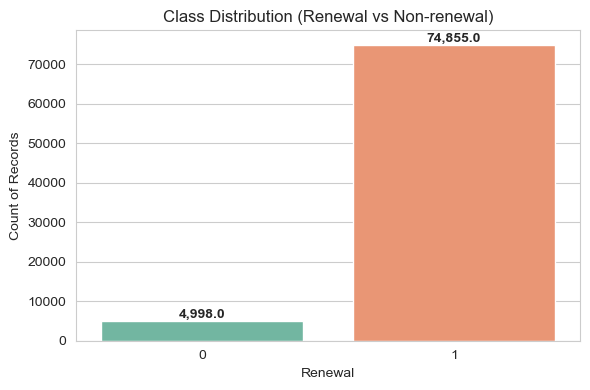

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of records by target
plt.figure(figsize=(6,4))
sns.countplot(x='renewal', data=OG, palette=['#66c2a5','#fc8d62'])

# Add labels on top of bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Class Distribution (Renewal vs Non-renewal)")
plt.xlabel("Renewal")
plt.ylabel("Count of Records")
plt.tight_layout()
plt.show()


In [105]:
# Show duplicate records
OG[OG.duplicated()]


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal


In [107]:
OG[OG.duplicated(subset=['perc_premium_paid_by_cash_credit', 
                      'age_in_days', 
                      'Income', 
                      'Count_3-6_months_late', 
                      'Count_6-12_months_late',
                      'Count_more_than_12_months_late',
                      'application_underwriting_score',
                      'no_of_premiums_paid',
                      'sourcing_channel',
                      'residence_area_type',
                      'premium',
                      'renewal'])]

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal


In [109]:
OG.shape

(79853, 13)

In [111]:
OG.isna().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
renewal                                0
dtype: int64

In [113]:
missing_cols = OG.columns[OG.isnull().any()].tolist()
missing_cols

['Count_3-6_months_late',
 'Count_6-12_months_late',
 'Count_more_than_12_months_late',
 'application_underwriting_score']

In [115]:
all_missing_records = OG[OG[missing_cols].isnull().all(axis=1)]
print("Rows where ALL missing columns are NaN:", len(all_missing_records))

Rows where ALL missing columns are NaN: 73


In [117]:
OG['Count_3-6_months_late'].value_counts(dropna=False)

Count_3-6_months_late
0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
NaN        97
6.0        68
7.0        23
8.0        15
9.0         4
13.0        1
12.0        1
11.0        1
10.0        1
Name: count, dtype: int64

In [119]:
OG['Count_6-12_months_late'].value_counts(dropna=False)

Count_6-12_months_late
0.0     75831
1.0      2680
2.0       693
3.0       317
4.0       130
NaN        97
5.0        46
6.0        26
7.0        11
8.0         5
10.0        4
9.0         4
11.0        2
14.0        2
13.0        2
17.0        1
15.0        1
12.0        1
Name: count, dtype: int64

In [121]:
OG['Count_more_than_12_months_late'].value_counts(dropna=False)

Count_more_than_12_months_late
0.0     76038
1.0      2996
2.0       498
3.0       151
NaN        97
4.0        48
5.0        13
6.0         6
7.0         3
8.0         2
11.0        1
Name: count, dtype: int64

In [123]:
OG['application_underwriting_score'].value_counts(dropna=False)

application_underwriting_score
NaN      2974
99.89    1972
99.88    1343
99.87     856
99.86     693
         ... 
94.07       1
92.71       1
92.50       1
92.85       1
93.57       1
Name: count, Length: 673, dtype: int64

In [125]:
# Age in years
OG['age_in_years'] = (OG['age_in_days'] / 365).astype(int)

# Age buckets
OG['age_group'] = pd.cut(
    OG['age_in_years'],
    bins=[0, 25, 40, 60, 100],
    labels=['<25', '25-40', '40-60', '60+']
)

# Premium buckets (quartiles as example)
OG['premium_group'] = pd.qcut(OG['premium'], 4, labels=['Low','Medium','High','Very High'])


In [127]:
renewal_rate = OG.groupby(['age_group','premium_group'])['renewal'].mean().unstack()
print(renewal_rate)

premium_group       Low    Medium      High  Very High
age_group                                             
<25            0.891685  0.894737  0.931034   0.947368
25-40          0.898873  0.905752  0.928066   0.927567
40-60          0.920076  0.920842  0.937671   0.948241
60+            0.965924  0.968470  0.968213   0.976725


/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_67792/3223351804.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  renewal_rate = OG.groupby(['age_group','premium_group'])['renewal'].mean().unstack()


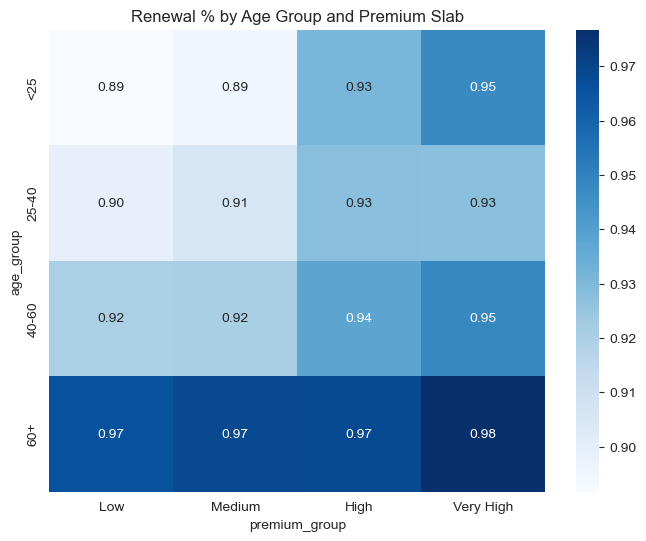

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(renewal_rate, annot=True, fmt=".2f", cmap="Blues")
plt.title("Renewal % by Age Group and Premium Slab")
plt.show()


In [131]:
OG_clean = OG.drop(columns=['id'])

In [133]:
OG_clean.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,age_in_years,age_group,premium_group
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33,25-40,Low
1,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59,40-60,Very High
2,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48,40-60,Low
3,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42,40-60,High
4,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86,60+,High


In [136]:
# Columns to impute
late_cols = ['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late']

# Create a copy for imputation
OG_late_imputed = OG_clean.copy()

# Impute missing values with 0
OG_late_imputed[late_cols] = OG_late_imputed[late_cols].fillna(0)

# Quick check
print(OG_late_imputed[late_cols].isnull().sum())


Count_3-6_months_late             0
Count_6-12_months_late            0
Count_more_than_12_months_late    0
dtype: int64


In [138]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = OG_late_imputed[OG_late_imputed['renewal'] == 1]
df_minority = OG_late_imputed[OG_late_imputed['renewal'] == 0]

# Downsample majority class
df_majority_downsampled = resample(
    df_majority,
    replace=False,             # sample without replacement
    n_samples=len(df_minority),# match minority count
    random_state=42            # reproducibility
)

# Combine back balanced dataset
OG_balanced = pd.concat([df_majority_downsampled, df_minority])


In [140]:
OG_balanced.shape

(9996, 15)

In [142]:
OG_balanced['renewal'].value_counts()


renewal
1    4998
0    4998
Name: count, dtype: int64

In [144]:
OG_balanced['age_in_years'] = (OG_balanced['age_in_days'] / 365).astype(int)

OG_balanced['age_group'] = pd.cut(
    OG_balanced['age_in_years'],
    bins=[0, 25, 40, 60, 100],
    labels=['<25', '25-40', '40-60', '60+']
)

OG_balanced['income_group'] = pd.qcut(OG_balanced['Income'], q=3, labels=['Low','Medium','High'])
OG_balanced['premium_group'] = pd.qcut(OG_balanced['premium'], q=4, labels=['Low','Medium','High','Very High'])
OG_balanced['premium_paid_group'] = pd.qcut(OG_balanced['no_of_premiums_paid'], q=3, labels=['Low','Medium','High'])


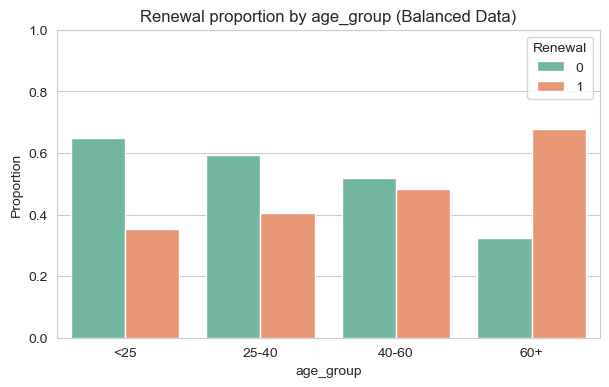

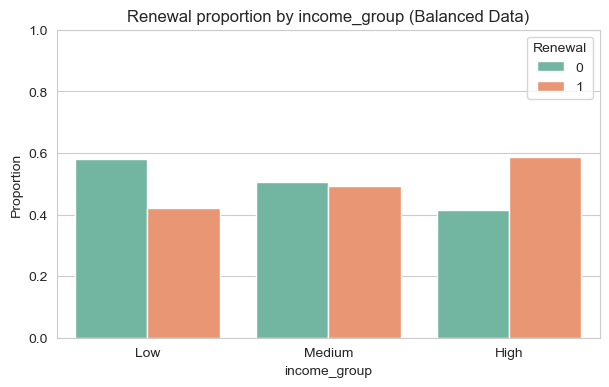

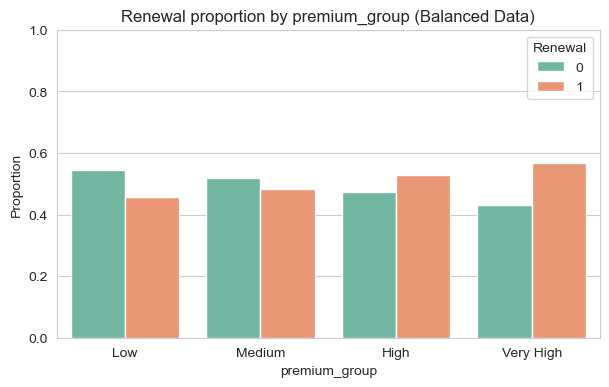

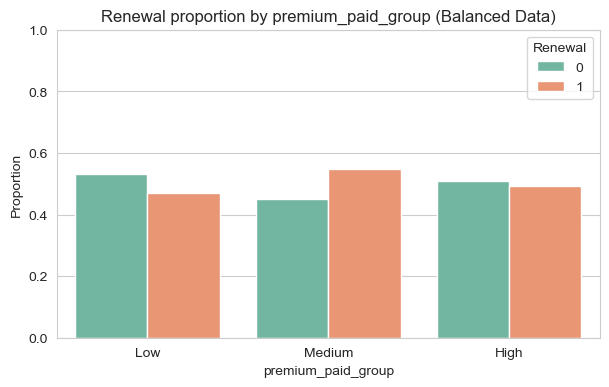

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

bucket_cols = ['age_group', 'income_group', 'premium_group', 'premium_paid_group']

for col in bucket_cols:
    crosstab = pd.crosstab(OG_balanced[col], OG_balanced['renewal'], normalize='index')
    crosstab = crosstab.reset_index().melt(id_vars=col, value_name='Proportion', var_name='Renewal')
    
    plt.figure(figsize=(7,4))
    sns.barplot(x=col, y='Proportion', hue='Renewal', data=crosstab, palette="Set2")
    plt.title(f"Renewal proportion by {col} (Balanced Data)")
    plt.ylabel("Proportion")
    plt.xlabel(col)
    plt.ylim(0,1)
    plt.show()


In [147]:
from sklearn.tree import DecisionTreeClassifier

def supervised_binning(df, feature, target, max_depth=3, min_samples_leaf=0.05):
    """
    Finds optimal cut points for a feature using a decision tree.
    """
    X = df[[feature]].dropna()
    y = df.loc[X.index, target]

    # Train shallow decision tree
    tree = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf, # as % of total
        random_state=42
    )
    tree.fit(X, y)

    # Extract thresholds
    thresholds = sorted(set(tree.tree_.threshold[tree.tree_.threshold > 0]))
    return thresholds


In [150]:
features_to_bin = ['age_in_years', 'Income', 'premium', 'no_of_premiums_paid']

for feature in features_to_bin:
    cuts = supervised_binning(OG_balanced, feature, 'renewal')
    print(f"Suggested cut points for {feature}: {cuts}")


Suggested cut points for age_in_years: [28.5, 35.5, 52.5, 54.5, 57.5, 62.5, 67.5]
Suggested cut points for Income: [77155.0, 102130.0, 120095.0, 160050.0, 182970.0, 200095.0, 300015.0]
Suggested cut points for premium: [4350.0, 6600.0, 8550.0, 10650.0, 14850.0, 21150.0]
Suggested cut points for no_of_premiums_paid: [3.5, 5.5, 13.5]


In [152]:
age_cuts = supervised_binning(OG_balanced, 'age_in_years', 'renewal')
OG_balanced['age_tree_bins'] = pd.cut(OG_balanced['age_in_years'], bins=[-np.inf] + age_cuts + [np.inf])


In [154]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


def supervised_binning(df, feature, target, max_depth=3, min_samples_leaf=0.05):
    """
    Finds optimal cut points for a feature using a decision tree
    and creates a binned column with range labels (min to max).
    """
    X = df[[feature]].dropna()
    y = df.loc[X.index, target]

    tree = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    tree.fit(X, y)

    # Extract thresholds
    thresholds = sorted(set(tree.tree_.threshold[tree.tree_.threshold > 0]))
    
    # Use actual min/max instead of inf
    min_val = df[feature].min()
    max_val = df[feature].max()
    
    bins = [min_val] + thresholds + [max_val]
    bin_labels = [f"{int(bins[i])} – {int(bins[i+1])}" for i in range(len(bins)-1)]
    
    # Add new binned column with ranges
    df[f"{feature}_tree_bin"] = pd.cut(df[feature], bins=bins, labels=bin_labels, include_lowest=True, duplicates="drop")
    
    return thresholds, bin_labels


In [156]:
features_to_bin = ['age_in_years', 'Income', 'premium', 'no_of_premiums_paid']

for feature in features_to_bin:
    cuts = supervised_binning(OG_balanced, feature, 'renewal')
    print(f"Suggested cut points for {feature}: {cuts}")


Suggested cut points for age_in_years: ([28.5, 35.5, 52.5, 54.5, 57.5, 62.5, 67.5], ['21 – 28', '28 – 35', '35 – 52', '52 – 54', '54 – 57', '57 – 62', '62 – 67', '67 – 101'])
Suggested cut points for Income: ([77155.0, 102130.0, 120095.0, 160050.0, 182970.0, 200095.0, 300015.0], ['24030 – 77155', '77155 – 102130', '102130 – 120095', '120095 – 160050', '160050 – 182970', '182970 – 200095', '200095 – 300015', '300015 – 7500070'])
Suggested cut points for premium: ([4350.0, 6600.0, 8550.0, 10650.0, 14850.0, 21150.0], ['1200 – 4350', '4350 – 6600', '6600 – 8550', '8550 – 10650', '10650 – 14850', '14850 – 21150', '21150 – 60000'])
Suggested cut points for no_of_premiums_paid: ([3.5, 5.5, 13.5], ['2 – 3', '3 – 5', '5 – 13', '13 – 59'])


In [158]:
def plot_tree_bins(df, feature):
    binned_col = f"{feature}_tree_bin"
    
    crosstab = pd.crosstab(df[binned_col], df['renewal'], normalize='index')
    crosstab = crosstab.reset_index().melt(id_vars=binned_col, value_name='Proportion', var_name='Renewal')
    
    plt.figure(figsize=(12,6))  # wider figure
    sns.barplot(x=binned_col, y='Proportion', hue='Renewal', data=crosstab, palette="Set2")
    plt.title(f"Renewal proportion by tree-based bins of {feature}")
    plt.ylabel("Proportion")
    plt.xlabel(f"{feature} (bins)")
    plt.ylim(0,1)
    plt.xticks(rotation=45, ha='right')
    plt.show()


age_in_years cut points: [28.5, 35.5, 52.5, 54.5, 57.5, 62.5, 67.5]
age_in_years bin labels: ['21 – 28', '28 – 35', '35 – 52', '52 – 54', '54 – 57', '57 – 62', '62 – 67', '67 – 101']


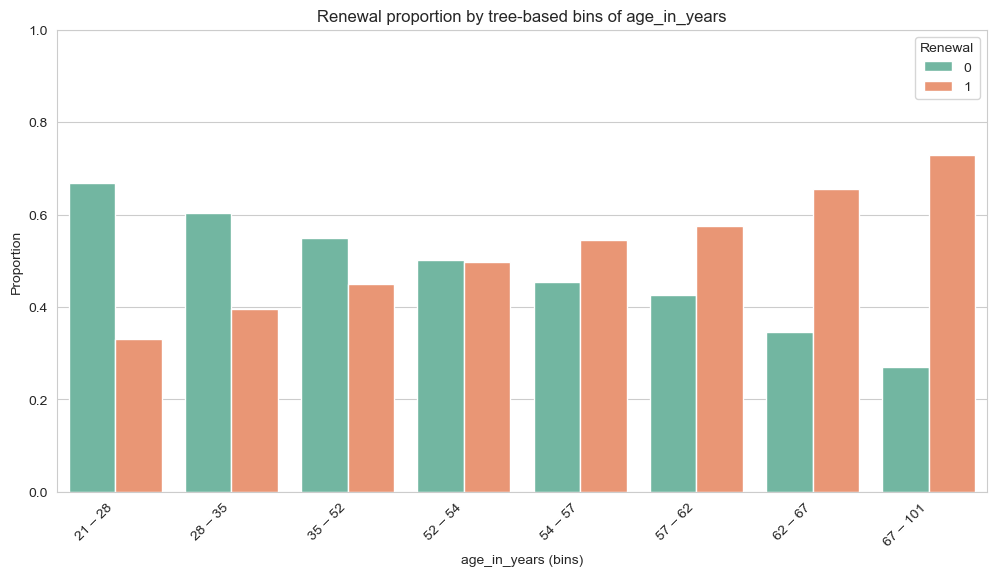

Income cut points: [77155.0, 102130.0, 120095.0, 160050.0, 182970.0, 200095.0, 300015.0]
Income bin labels: ['24030 – 77155', '77155 – 102130', '102130 – 120095', '120095 – 160050', '160050 – 182970', '182970 – 200095', '200095 – 300015', '300015 – 7500070']


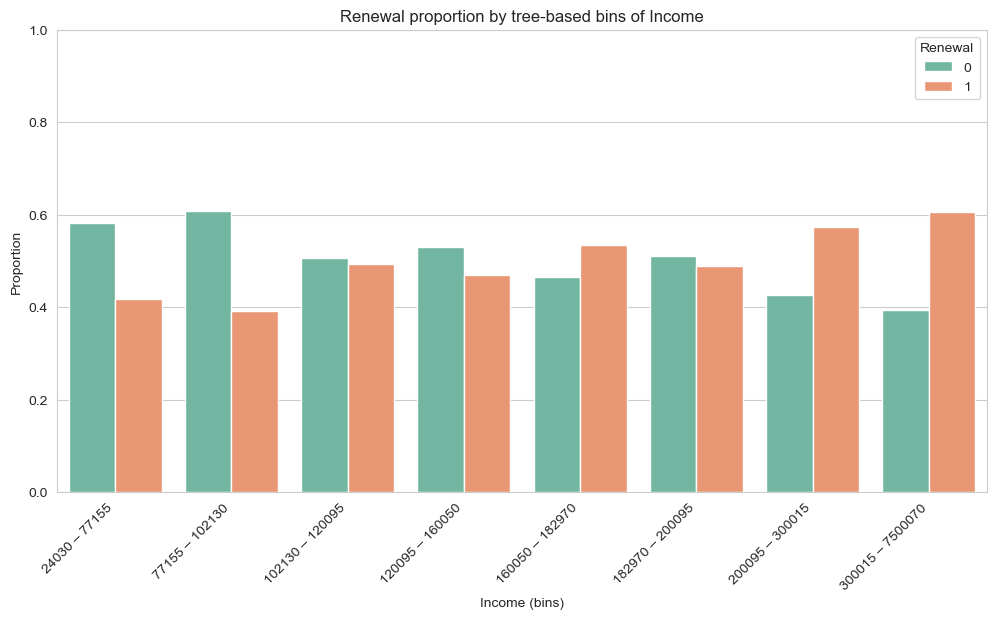

premium cut points: [4350.0, 6600.0, 8550.0, 10650.0, 14850.0, 21150.0]
premium bin labels: ['1200 – 4350', '4350 – 6600', '6600 – 8550', '8550 – 10650', '10650 – 14850', '14850 – 21150', '21150 – 60000']


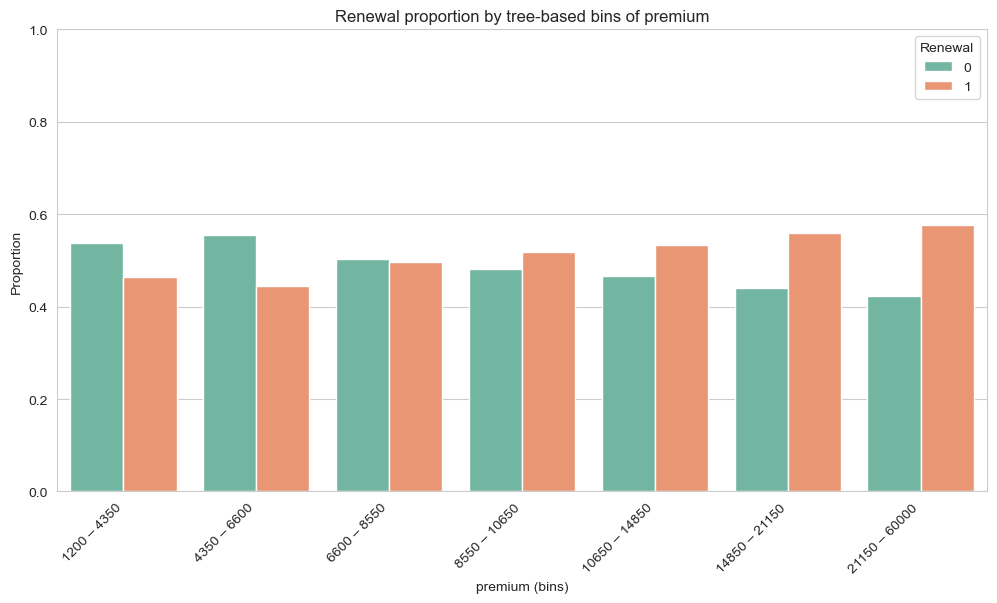

no_of_premiums_paid cut points: [3.5, 5.5, 13.5]
no_of_premiums_paid bin labels: ['2 – 3', '3 – 5', '5 – 13', '13 – 59']


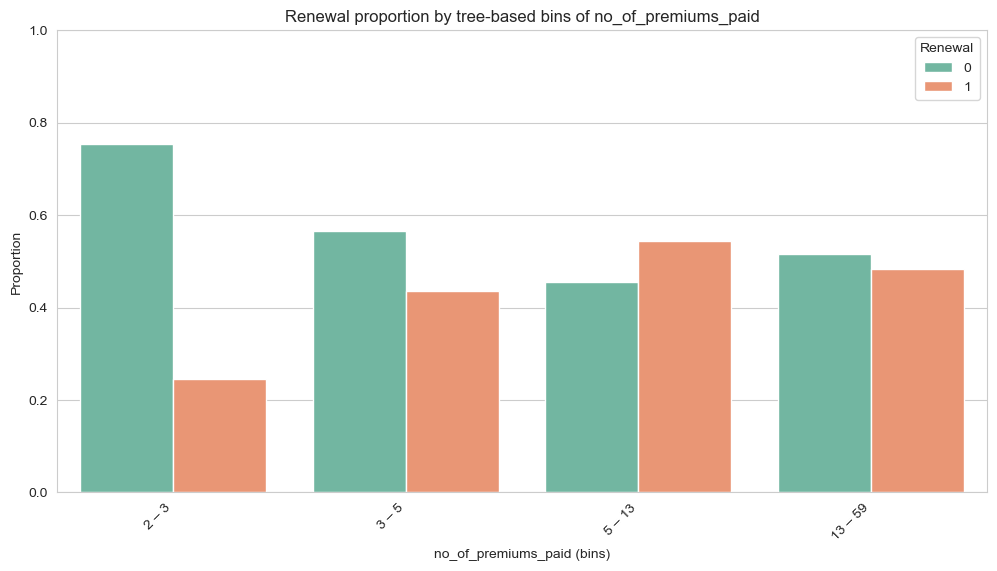

In [160]:
features_to_bin = ['age_in_years', 'Income', 'premium', 'no_of_premiums_paid']

for feature in features_to_bin:
    cuts, labels = supervised_binning(OG_balanced, feature, 'renewal')
    print(f"{feature} cut points: {cuts}")
    print(f"{feature} bin labels: {labels}")
    plot_tree_bins(OG_balanced, feature)


In [161]:
def supervised_binning(df, feature, target, max_depth=2, min_samples_leaf=0.1):
    """
    Finds optimal cut points for a feature using a decision tree
    and creates a binned column with fewer, larger bins.
    """
    X = df[[feature]].dropna()
    y = df.loc[X.index, target]

    tree = DecisionTreeClassifier(
        max_depth=max_depth,          # restrict depth
        min_samples_leaf=min_samples_leaf,  # ensure enough samples per bin
        random_state=42
    )
    tree.fit(X, y)

    # Extract thresholds
    thresholds = sorted(set(tree.tree_.threshold[tree.tree_.threshold > 0]))
    
    # Use actual min/max instead of inf
    min_val = df[feature].min()
    max_val = df[feature].max()
    
    bins = [min_val] + thresholds + [max_val]
    bin_labels = [f"{int(bins[i])} – {int(bins[i+1])}" for i in range(len(bins)-1)]
    
    # Add new binned column
    df[f"{feature}_tree_bin"] = pd.cut(df[feature], bins=bins, labels=bin_labels, include_lowest=True, duplicates="drop")
    
    return thresholds, bin_labels


age_in_years cut points: [35.5, 54.5, 62.5]
age_in_years bin labels: ['21 – 35', '35 – 54', '54 – 62', '62 – 101']


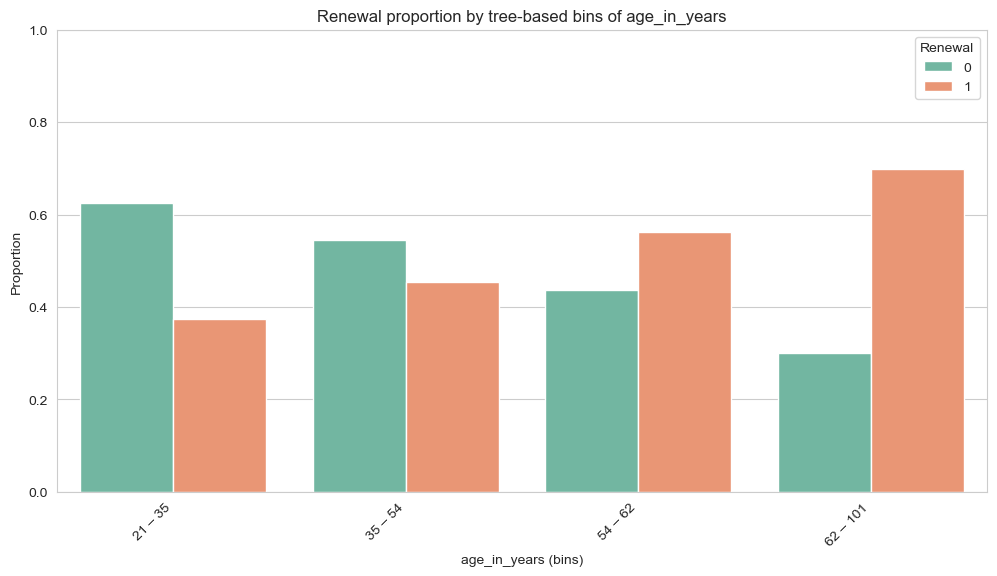

Income cut points: [102130.0, 160050.0, 200095.0]
Income bin labels: ['24030 – 102130', '102130 – 160050', '160050 – 200095', '200095 – 7500070']


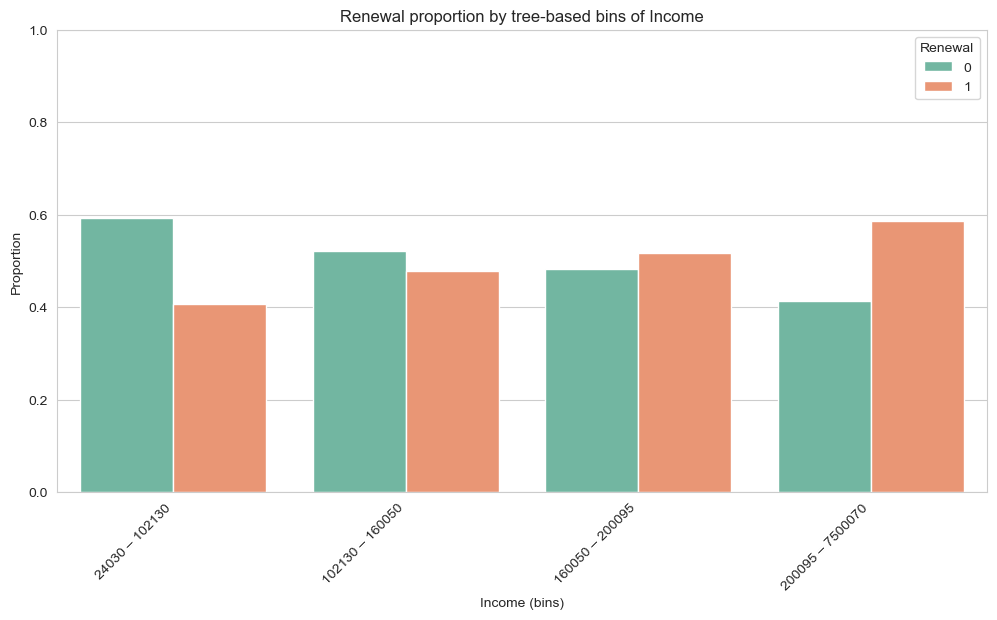

premium cut points: [6600.0, 8550.0, 14850.0]
premium bin labels: ['1200 – 6600', '6600 – 8550', '8550 – 14850', '14850 – 60000']


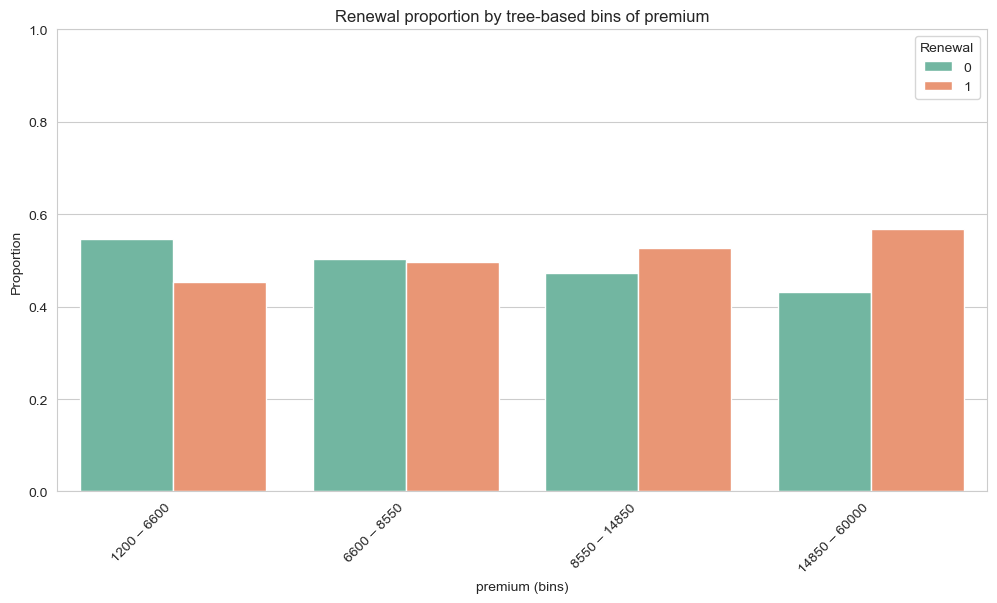

no_of_premiums_paid cut points: [4.5, 15.5]
no_of_premiums_paid bin labels: ['2 – 4', '4 – 15', '15 – 59']


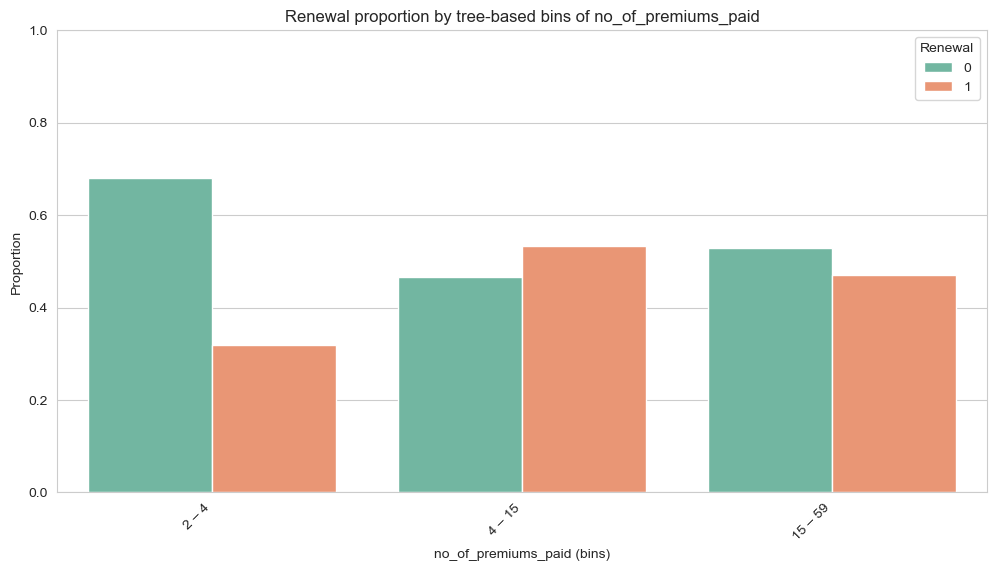

In [164]:
for feature in ['age_in_years', 'Income', 'premium', 'no_of_premiums_paid']:
    cuts, labels = supervised_binning(OG_balanced, feature, 'renewal', max_depth=2, min_samples_leaf=0.1)
    print(f"{feature} cut points: {cuts}")
    print(f"{feature} bin labels: {labels}")
    plot_tree_bins(OG_balanced, feature)


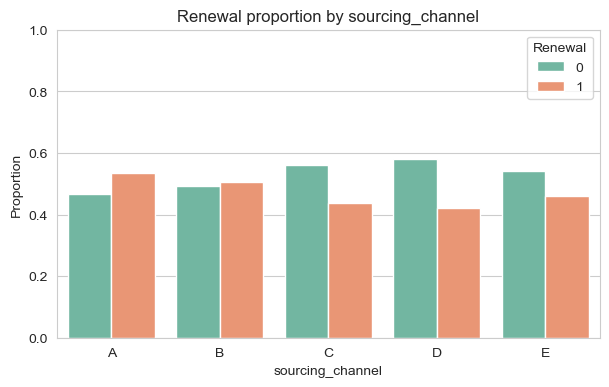

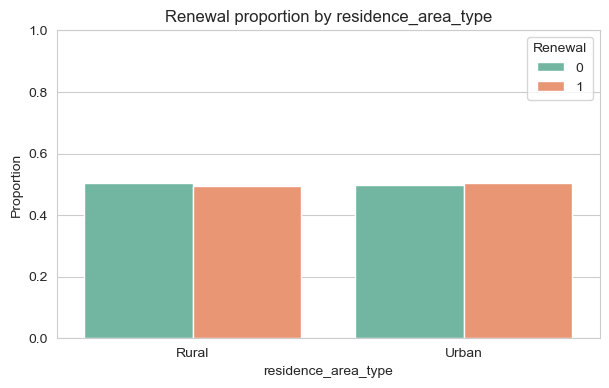

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['sourcing_channel', 'residence_area_type']

for col in cat_cols:
    crosstab = pd.crosstab(OG_balanced[col], OG_balanced['renewal'], normalize='index')
    crosstab = crosstab.reset_index().melt(id_vars=col, value_name='Proportion', var_name='Renewal')
    
    plt.figure(figsize=(7,4))
    sns.barplot(x=col, y='Proportion', hue='Renewal', data=crosstab, palette="Set2")
    plt.title(f"Renewal proportion by {col}")
    plt.ylabel("Proportion")
    plt.xlabel(col)
    plt.ylim(0,1)
    plt.show()


In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crosstab of residence vs renewal
ct = pd.crosstab(df_pca['residence_area_type'], df_pca['renewal'], normalize='index')
plt.figure(figsize=(7,5))
ax = ct.plot(kind='bar', stacked=True, figsize=(7,5), color=['#66c2a5','#fc8d62'])

plt.title("Renewal proportion by residence_area_type")
plt.xlabel("residence_area_type")
plt.ylabel("Proportion")
plt.ylim(0,1)

# Add ratio annotations
for idx, row in ct.iterrows():
    non = row[0] * 100
    ren = row[1] * 100
    ax.text(x=idx, y=0.5, s=f"{ren:.1f}% : {non:.1f}%", 
            ha='center', va='center', fontsize=10, color='black', fontweight='bold')

plt.legend(title="Renewal", labels=['0 (Non-renewal)', '1 (Renewal)'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


ConversionError: Failed to convert value(s) to axis units: 'Rural'

Error in callback <function _draw_all_if_interactive at 0x160194040> (for post_execute), with arguments args (),kwargs {}:


ConversionError: Failed to convert value(s) to axis units: 'Rural'

<Figure size 700x500 with 0 Axes>

ConversionError: Failed to convert value(s) to axis units: 'Rural'

<Figure size 700x500 with 1 Axes>

In [169]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Copy dataset
df_pca = OG_balanced.copy()

# Separate features and target
X = df_pca.drop(columns=['renewal'])
y = df_pca['renewal']

# Identify numeric and categorical features
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocess: scale numeric, one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)


In [171]:
df_pca = OG.copy()

# Fill numeric NaNs with median
num_cols = df_pca.select_dtypes(include=['int64','float64']).columns
df_pca[num_cols] = df_pca[num_cols].apply(lambda x: x.fillna(x.median()))

# Fill categorical NaNs with "Missing"
cat_cols = df_pca.select_dtypes(include=['object']).columns
df_pca[cat_cols] = df_pca[cat_cols].fillna("Missing")


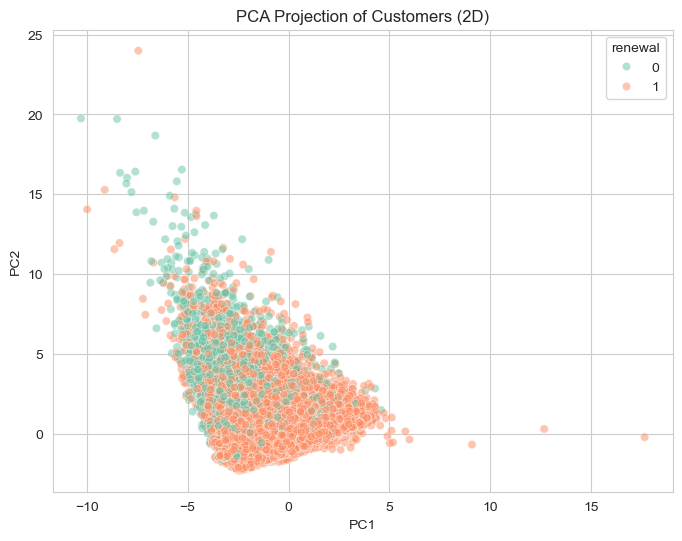

In [173]:
# Separate features and target
X = df_pca.drop(columns=['renewal'])
y = df_pca['renewal']

# Identify numeric and categorical again
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessor: scale + one-hot
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_processed)

# DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
pca_df['renewal'] = y.values

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='renewal', alpha=0.5, palette='Set2')
plt.title("PCA Projection of Customers (2D)")
plt.show()


scikit-learn version: 1.5.1
Numeric cols: ['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'age_in_years']
Categorical cols: ['sourcing_channel', 'residence_area_type', 'age_group', 'premium_group']
Processed shape: (79853, 23) dtype: float64
Number of features after preprocessing: 23
First 10 feature names: ['num__id' 'num__perc_premium_paid_by_cash_credit' 'num__age_in_days'
 'num__Income' 'num__Count_3-6_months_late' 'num__Count_6-12_months_late'
 'num__Count_more_than_12_months_late'
 'num__application_underwriting_score' 'num__no_of_premiums_paid'
 'num__premium']
Explained variance ratio (PC1, PC2): [0.1928 0.1238]

Target distribution (counts):
renewal
1    74855
0     4998
Name: count, dtype: int64

Target distribution (percent):
renewal
1    93.74
0     6.26
Name: proportion, dtype: float64


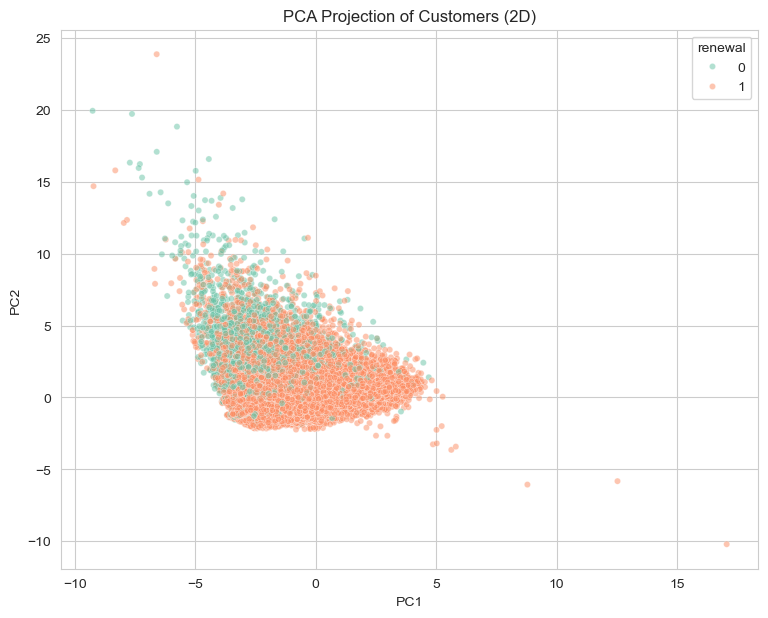

In [174]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("scikit-learn version:", sklearn.__version__)

# Prepare X, y
X = df_pca.drop(columns=['renewal']).copy()
y = df_pca['renewal'].copy()

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)

# Build OneHotEncoder with cross-version support
ohe = None
ohe_kwargs = dict(drop='first', handle_unknown='ignore')
try:
    # try older param name
    ohe = OneHotEncoder(**{**ohe_kwargs, 'sparse': False})
except TypeError:
    # fallback to newer param name
    ohe = OneHotEncoder(**{**ohe_kwargs, 'sparse_output': False})

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', ohe, cat_cols)
    ],
    remainder='drop'
)

# Fit-transform
X_processed = preprocessor.fit_transform(X)
print("Processed shape:", X_processed.shape, "dtype:", X_processed.dtype)

# Optional: get feature names (robust)
try:
    feature_names = preprocessor.get_feature_names_out()
    print("Number of features after preprocessing:", len(feature_names))
    print("First 10 feature names:", feature_names[:10])
except Exception as e:
    print("Couldn't get feature names automatically:", e)
    feature_names = None

# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_processed)
print("Explained variance ratio (PC1, PC2):", np.round(pca.explained_variance_ratio_, 4))

# Quick checks on target balance
print("\nTarget distribution (counts):")
print(y.value_counts(dropna=False))
print("\nTarget distribution (percent):")
print(y.value_counts(normalize=True).mul(100).round(2))

# DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
pca_df['renewal'] = y.values

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(9,7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='renewal', alpha=0.5, palette='Set2', s=20)
plt.title("PCA Projection of Customers (2D)")
plt.show()


In [175]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# PCA with 3 components
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_processed)

# Create DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
pca_df['renewal'] = y.values


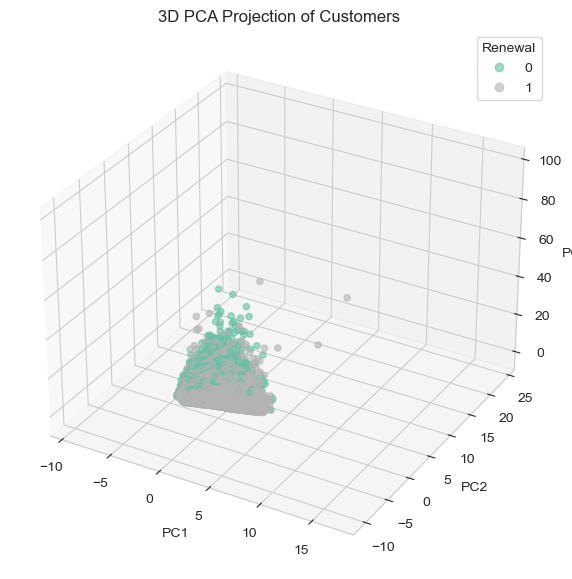

In [177]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(
    pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
    c=pca_df['renewal'], cmap='Set2', alpha=0.6
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D PCA Projection of Customers")
plt.legend(*sc.legend_elements(), title="Renewal")
plt.show()


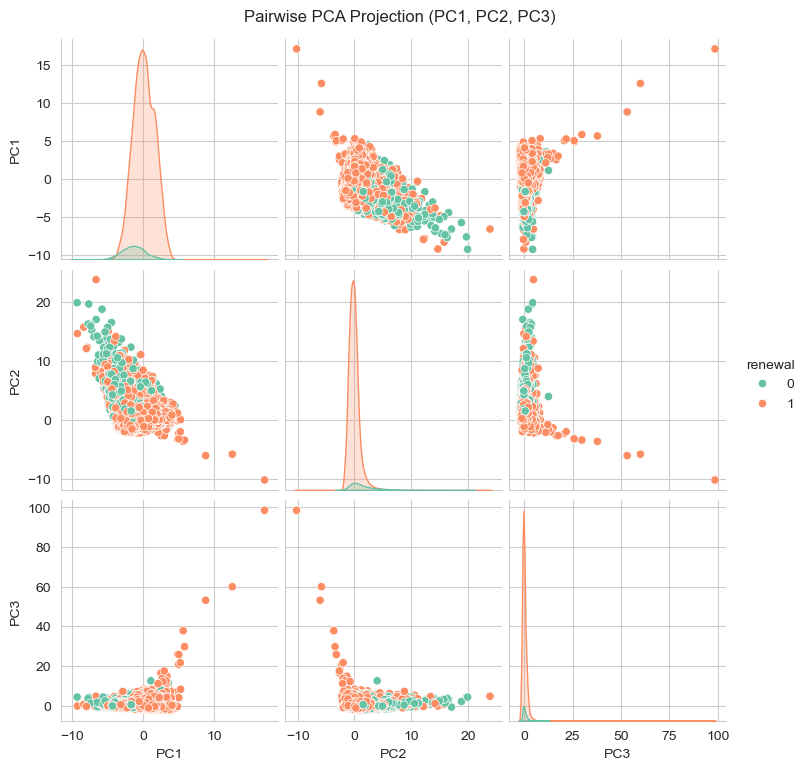

In [178]:
sns.pairplot(pca_df, hue="renewal", vars=["PC1","PC2","PC3"], palette="Set2", diag_kind="kde")
plt.suptitle("Pairwise PCA Projection (PC1, PC2, PC3)", y=1.02)
plt.show()


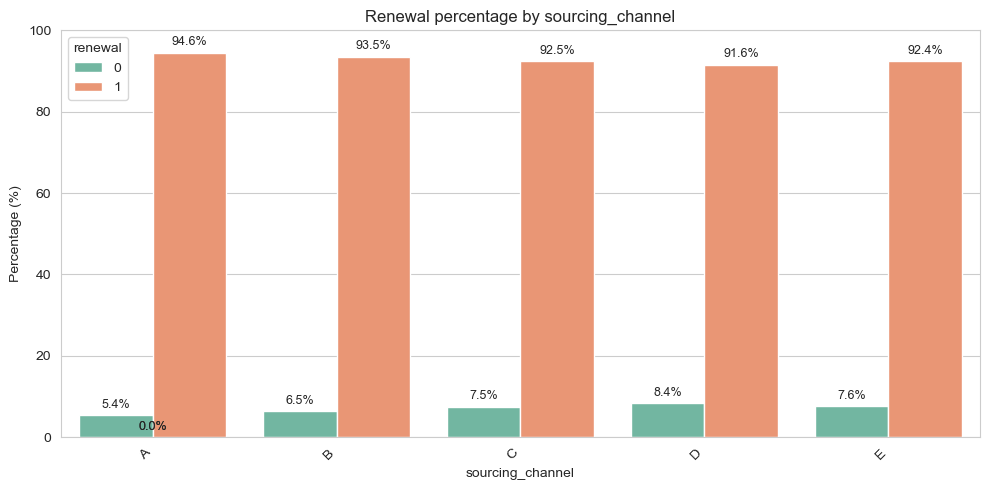

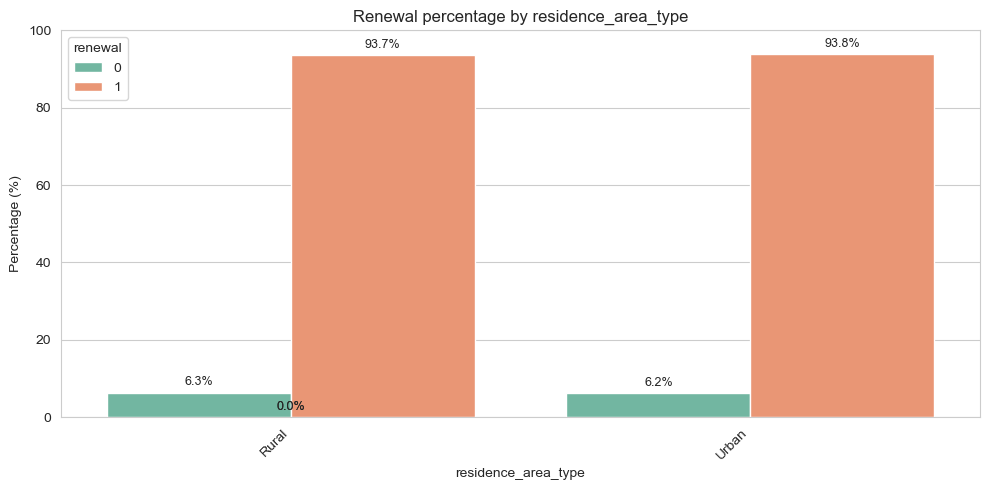

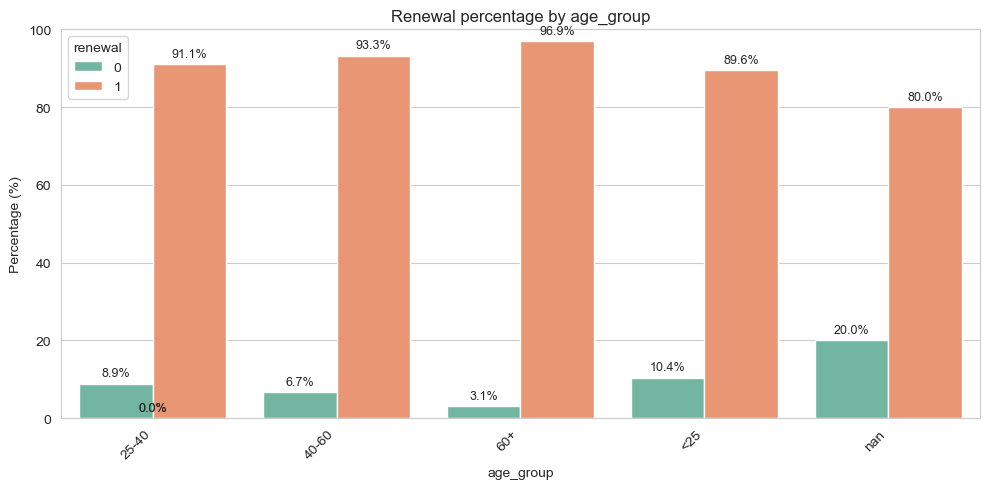

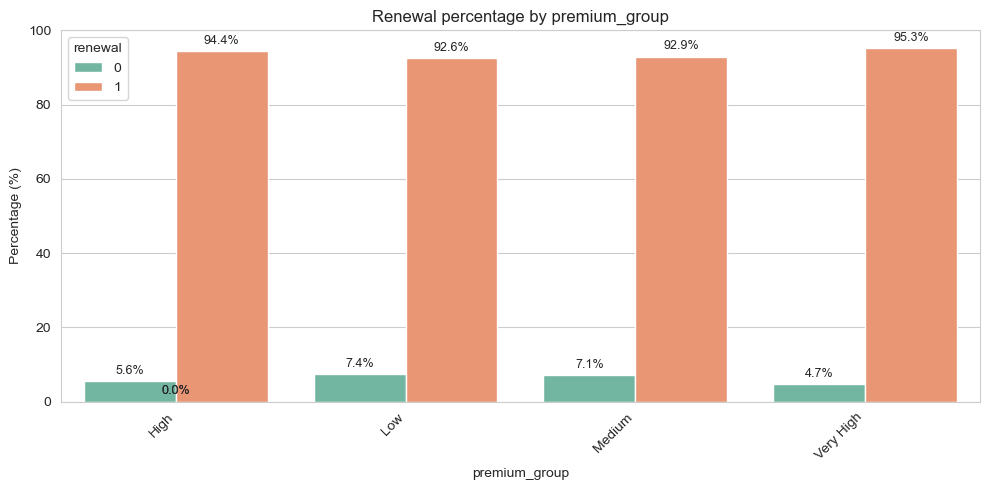

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_cat_vs_target_percent_str(df, target='renewal'):
    cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
    if len(cat_cols) == 0:
        print("No categorical columns found.")
        return

    for col in cat_cols:
        tmp = df[[col, target]].copy()
        # convert to string first so fillna with a new label is always allowed
        tmp[col] = tmp[col].astype(str).fillna("Missing")  

        # Crosstab normalized by row -> percentages
        prop = pd.crosstab(tmp[col], tmp[target], normalize='index') * 100

        prop_melt = prop.reset_index().melt(id_vars=col, var_name=target, value_name='percentage')

        plt.figure(figsize=(10,5))
        ax = sns.barplot(x=col, y='percentage', hue=target, data=prop_melt, palette='Set2')

        # labels
        for p in ax.patches:
            height = p.get_height()
            if not np.isnan(height):
                ax.annotate(f"{height:.1f}%", (p.get_x() + p.get_width()/2., height),
                            ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords='offset points')

        plt.title(f"Renewal percentage by {col}")
        plt.ylabel("Percentage (%)")
        plt.xlabel(col)
        plt.ylim(0, 100)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=target)
        plt.tight_layout()
        plt.show()

# Run on OG
plot_cat_vs_target_percent_str(OG, target='renewal')


In [180]:
OG_work = OG_clean.copy()
late_cols = [
    'Count_3-6_months_late',
    'Count_6-12_months_late',
    'Count_more_than_12_months_late'
]
OG_work[late_cols] = OG_work[late_cols].fillna(0)

In [183]:
cat_cols = OG_work.select_dtypes(include=['object','category']).columns.tolist()
num_cols = OG_work.select_dtypes(include=['int64','float64']).columns.tolist()


In [184]:
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe_array = ohe.fit_transform(OG_work[cat_cols])

In [186]:
ohe_df = pd.DataFrame(
    ohe_array,
    columns=ohe.get_feature_names_out(cat_cols),
    index=OG_work.index
)


In [187]:
OG_encoded = pd.concat([OG_work[num_cols], ohe_df], axis=1)


In [188]:
imputer = KNNImputer(n_neighbors=5)
OG_knn_imputed_array = imputer.fit_transform(OG_encoded)


In [189]:
OG_knn_imputed = pd.DataFrame(
    OG_knn_imputed_array,
    columns=OG_encoded.columns,
    index=OG_encoded.index
)

In [190]:
orig_missing_mask = OG_clean['application_underwriting_score'].isnull()
imputed_values = OG_knn_imputed.loc[orig_missing_mask, 'application_underwriting_score']
print("Number of application_underwriting_score rows imputed:", imputed_values.shape[0])
print(imputed_values.head(10))

Number of application_underwriting_score rows imputed: 2974
18     98.802
26     99.782
39     98.922
60     99.274
61     98.834
76     99.382
77     99.152
84     98.350
140    99.812
145    97.954
Name: application_underwriting_score, dtype: float64


In [191]:
OG_knn_imputed.isna().sum()

perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
premium                             0
renewal                             0
age_in_years                        0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
sourcing_channel_E                  0
residence_area_type_Urban           0
age_group_40-60                     0
age_group_60+                       0
age_group_<25                       0
age_group_nan                       0
premium_group_Low                   0
premium_group_Medium                0
premium_group_Very High             0
dtype: int64

In [193]:
OG_imputed = OG_clean.copy()

In [194]:
late_cols = [
    'Count_3-6_months_late',
    'Count_6-12_months_late',
    'Count_more_than_12_months_late'
]
OG_imputed[late_cols] = OG_imputed[late_cols].fillna(0)

# 3) Only impute application_underwriting_score using KNN results we already computed
# Grab the imputed values from OG_knn_imputed
OG_imputed.loc[:, 'application_underwriting_score'] = OG_knn_imputed['application_underwriting_score'].values


In [195]:
OG_imputed

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,age_in_years,age_group,premium_group
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33,25-40,Low
1,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59,40-60,Very High
2,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48,40-60,Low
3,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42,40-60,High
4,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86,60+,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79848,0.425,23367,224550,1.0,0.0,0.0,98.70,19,B,Urban,13800,1,64,60+,High
79849,0.704,19356,279150,1.0,0.0,1.0,99.42,12,A,Rural,28500,1,53,40-60,Very High
79850,0.000,23372,305020,0.0,0.0,0.0,98.89,12,A,Rural,9600,1,64,60+,High
79851,0.398,22641,39330,0.0,0.0,0.0,98.68,8,A,Rural,5700,1,62,60+,Medium


In [196]:
OG_imputed = OG_imputed.drop(columns=['age_in_days'])

In [197]:
num_cols = OG_imputed.select_dtypes(include=['int64','float64']).columns
cat_cols = OG_imputed.select_dtypes(include=['object']).columns


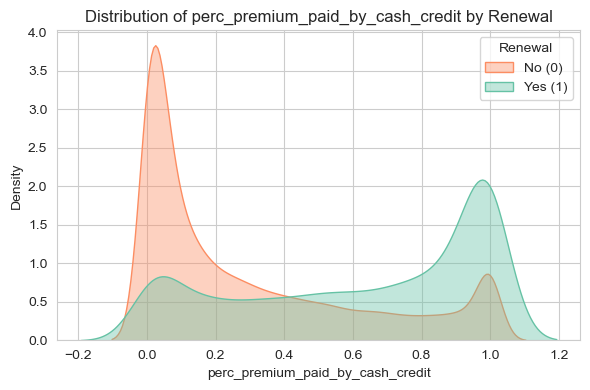

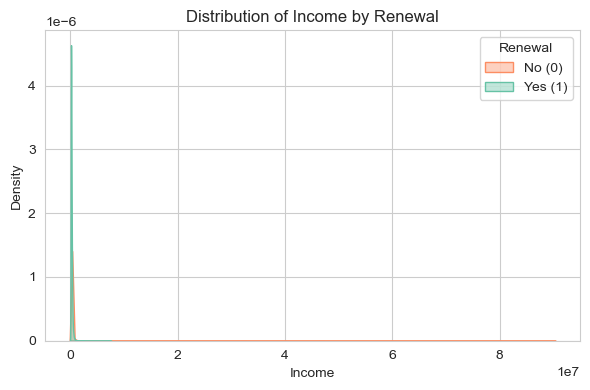

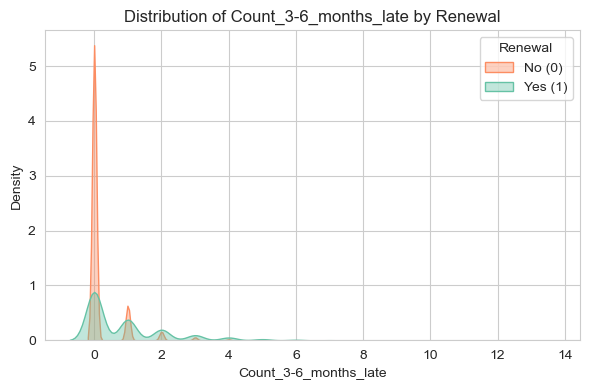

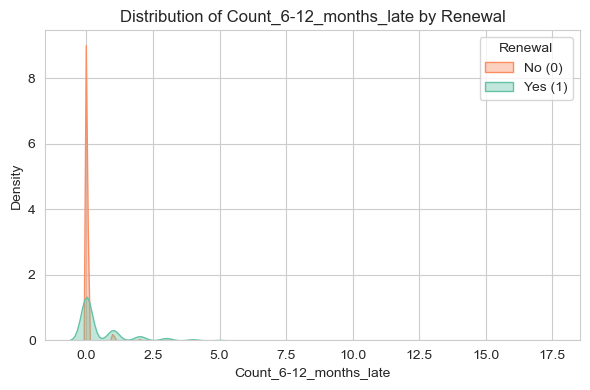

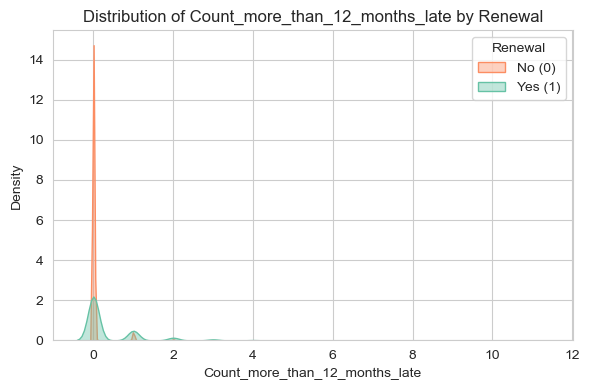

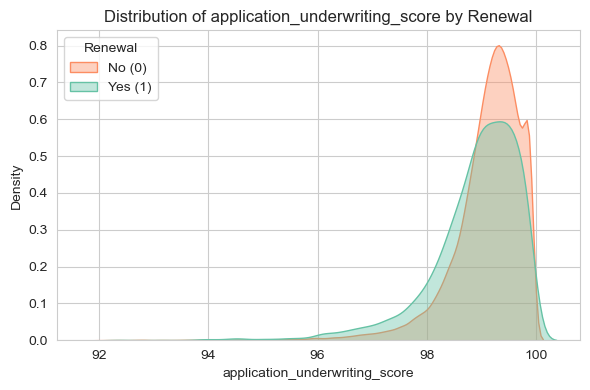

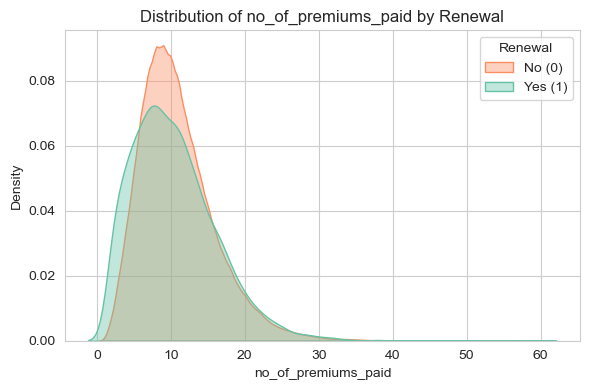

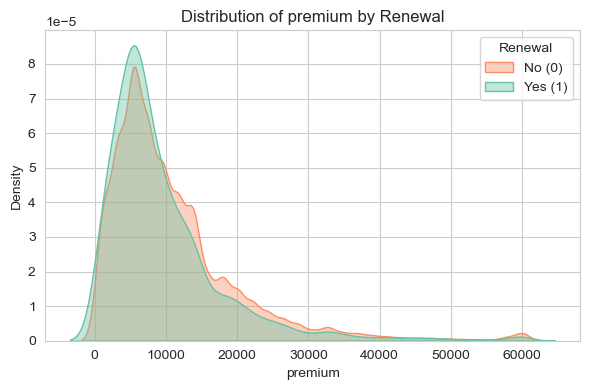

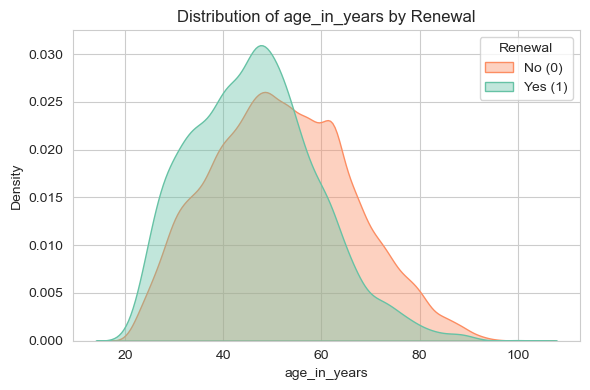

In [198]:

df = OG_imputed.copy()
target = 'renewal'
num_cols = df.select_dtypes(include=['int64','float64']).columns.drop(target)

# Loop through numeric features
for col in num_cols:
    plt.figure(figsize=(6,4))   # ✅ bigger size
    sns.kdeplot(data=df, x=col, hue=target, fill=True, common_norm=False, alpha=0.4, palette="Set2")
    plt.title(f"Distribution of {col} by Renewal")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(title="Renewal", labels=["No (0)", "Yes (1)"])
    plt.tight_layout()
    plt.show()

Numeric cols: ['perc_premium_paid_by_cash_credit', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'age_in_years']
Skewed cols (will apply log1p): ['Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium']
Non-skewed numeric cols (no log): ['perc_premium_paid_by_cash_credit', 'age_in_years']


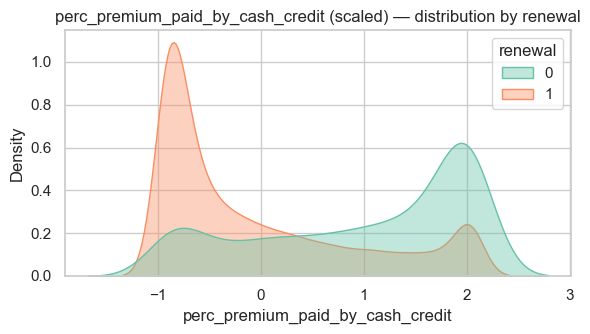

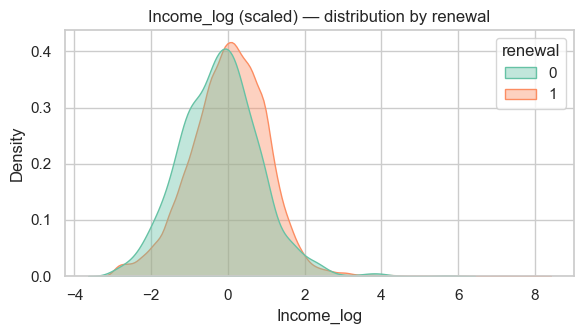

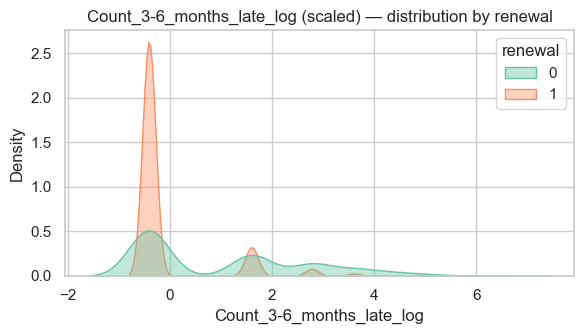

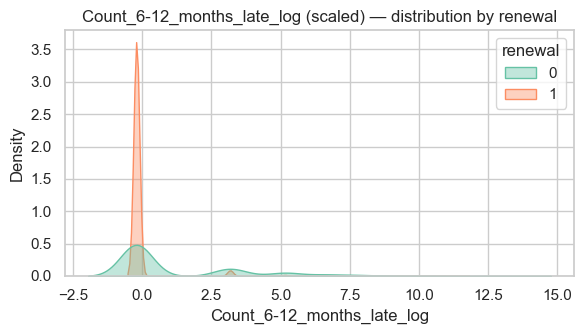

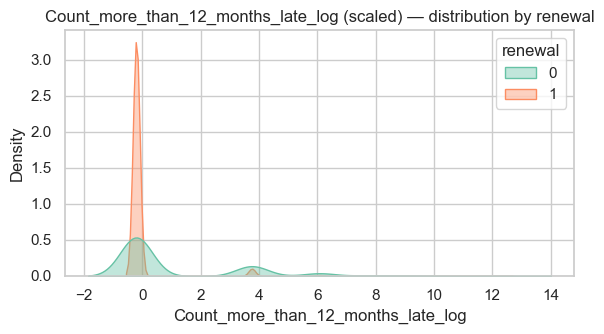

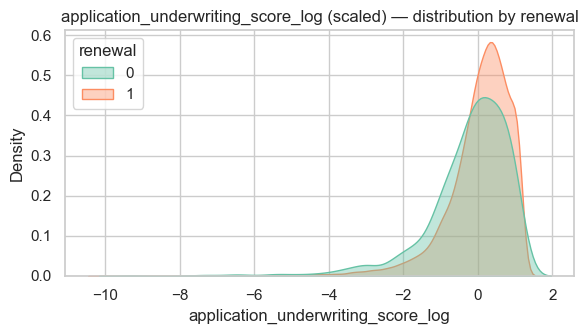

/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_67792/3891359186.py:97: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_table = X_viz.groupby('bucket')['renewal'].mean().reset_index()
/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_67792/3891359186.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bucket_table, x='bucket', y='renewal_pct', palette='viridis')


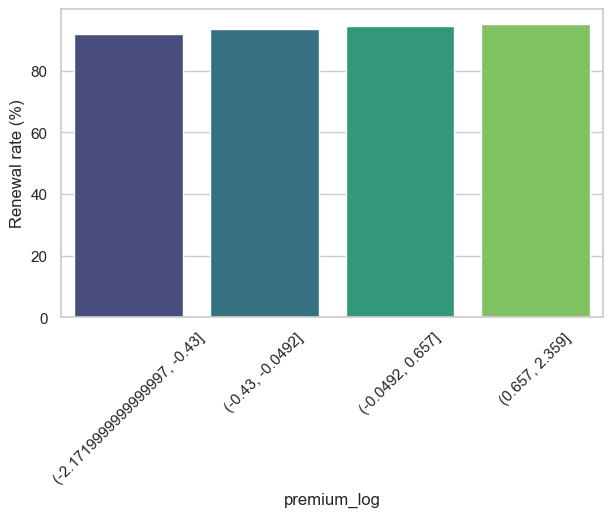

In [199]:
# Plotting-only preprocessing: log1p on skewed features -> StandardScaler
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def build_viz_scaled_df(df, target='renewal', skew_thresh=1.0, sample_n=None):
    """
    Returns a DataFrame safe for plotting:
      - makes a copy of df
      - detects numeric cols (excluding target)
      - applies log1p to cols with abs(skew) > skew_thresh (safe shift if negatives)
      - standardizes all numeric cols (mean=0, std=1)
      - keeps categorical cols and target unchanged
    Also prints which columns were log-transformed.
    """
    df = df.copy()
    # numeric columns excluding target
    num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
    if target in num_cols:
        num_cols.remove(target)
    cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
    
    # compute skewness (ignore NaNs)
    skewness = df[num_cols].skew(skipna=True)
    skewed = skewness[skewness.abs() > skew_thresh].index.tolist()
    not_skewed = [c for c in num_cols if c not in skewed]
    
    print("Numeric cols:", num_cols)
    print("Skewed cols (will apply log1p):", skewed)
    print("Non-skewed numeric cols (no log):", not_skewed)
    
    # safe log1p transform for skewed cols (handles zeros and possible negatives)
    def safe_log1p(series):
        arr = series.to_numpy(dtype=float)
        minv = np.nanmin(arr)
        if np.isfinite(minv) and minv < 0:
            shift = -(minv) + 1e-6
            arr = arr + shift
        return np.log1p(arr)
    
    for c in skewed:
        df[c + "_log"] = safe_log1p(df[c])
    
    # Build matrix to scale: use log cols where present, else original numeric
    scaled_input_cols = []
    for c in num_cols:
        if c in skewed:
            scaled_input_cols.append(c + "_log")
        else:
            scaled_input_cols.append(c)
    
    # Fill NaNs (should be none in your OG_imputed, but safe): use column median
    df_scaled = df[scaled_input_cols].copy()
    df_scaled = df_scaled.fillna(df_scaled.median())
    
    scaler = StandardScaler()
    scaled_arr = scaler.fit_transform(df_scaled)
    X_scaled_num = pd.DataFrame(scaled_arr, columns=scaled_input_cols, index=df.index)
    
    # Build final viz DataFrame: scaled numeric cols, original categoricals, and target
    X_viz = pd.concat([X_scaled_num, df[cat_cols], df[[target]]], axis=1)
    
    # Optional sampling for speed when plotting
    if sample_n is not None and len(X_viz) > sample_n:
        X_viz = X_viz.sample(sample_n, random_state=42)
    
    return X_viz, skewed, scaler

# --------- Usage example ----------
# 1) build viz DataFrame (does not modify OG_imputed)
X_viz, log_cols, scaler_used = build_viz_scaled_df(OG_imputed, target='renewal', skew_thresh=1.0, sample_n=20000)

# 2) Quick check: KDE plots for a few features (scaled)
sns.set(style="whitegrid")
features_to_plot = X_viz.select_dtypes(include=['float','int']).columns.drop('renewal').tolist()

# Example: plot first 6 numeric features (scaled) as clean KDEs
for col in features_to_plot[:6]:
    plt.figure(figsize=(6,3.5))
    sns.kdeplot(data=X_viz, x=col, hue='renewal', fill=True, common_norm=False, alpha=0.4, palette="Set2")
    plt.title(f"{col} (scaled) — distribution by renewal")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

# 3) If you want a business-friendly bucketed bar plot for an original feature (e.g., premium),
#    use the *log-transformed* column name if it was transformed: 'premium_log' if in log_cols
# Example:
feat = 'premium'
feat_plot_col = feat + '_log' if feat in log_cols else feat
if feat_plot_col in X_viz.columns:
    # create buckets on the scaled (z) values or on original log values (here using scaled z)
    X_viz['bucket'] = pd.qcut(X_viz[feat_plot_col], q=4, duplicates='drop')
    bucket_table = X_viz.groupby('bucket')['renewal'].mean().reset_index()
    bucket_table['renewal_pct'] = bucket_table['renewal'] * 100
    plt.figure(figsize=(7,4))
    sns.barplot(data=bucket_table, x='bucket', y='renewal_pct', palette='viridis')
    plt.ylabel("Renewal rate (%)")
    plt.xlabel(feat_plot_col)
    plt.xticks(rotation=45)
    plt.show()
    X_viz.drop(columns=['bucket'], inplace=True)


/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_67792/1829263348.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='renewal', loc='upper right', fontsize=9)
/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_67792/1829263348.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='renewal', loc='upper right', fontsize=9)
/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_67792/1829263348.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='renewal', loc='upper right', fontsize=9)
/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_67

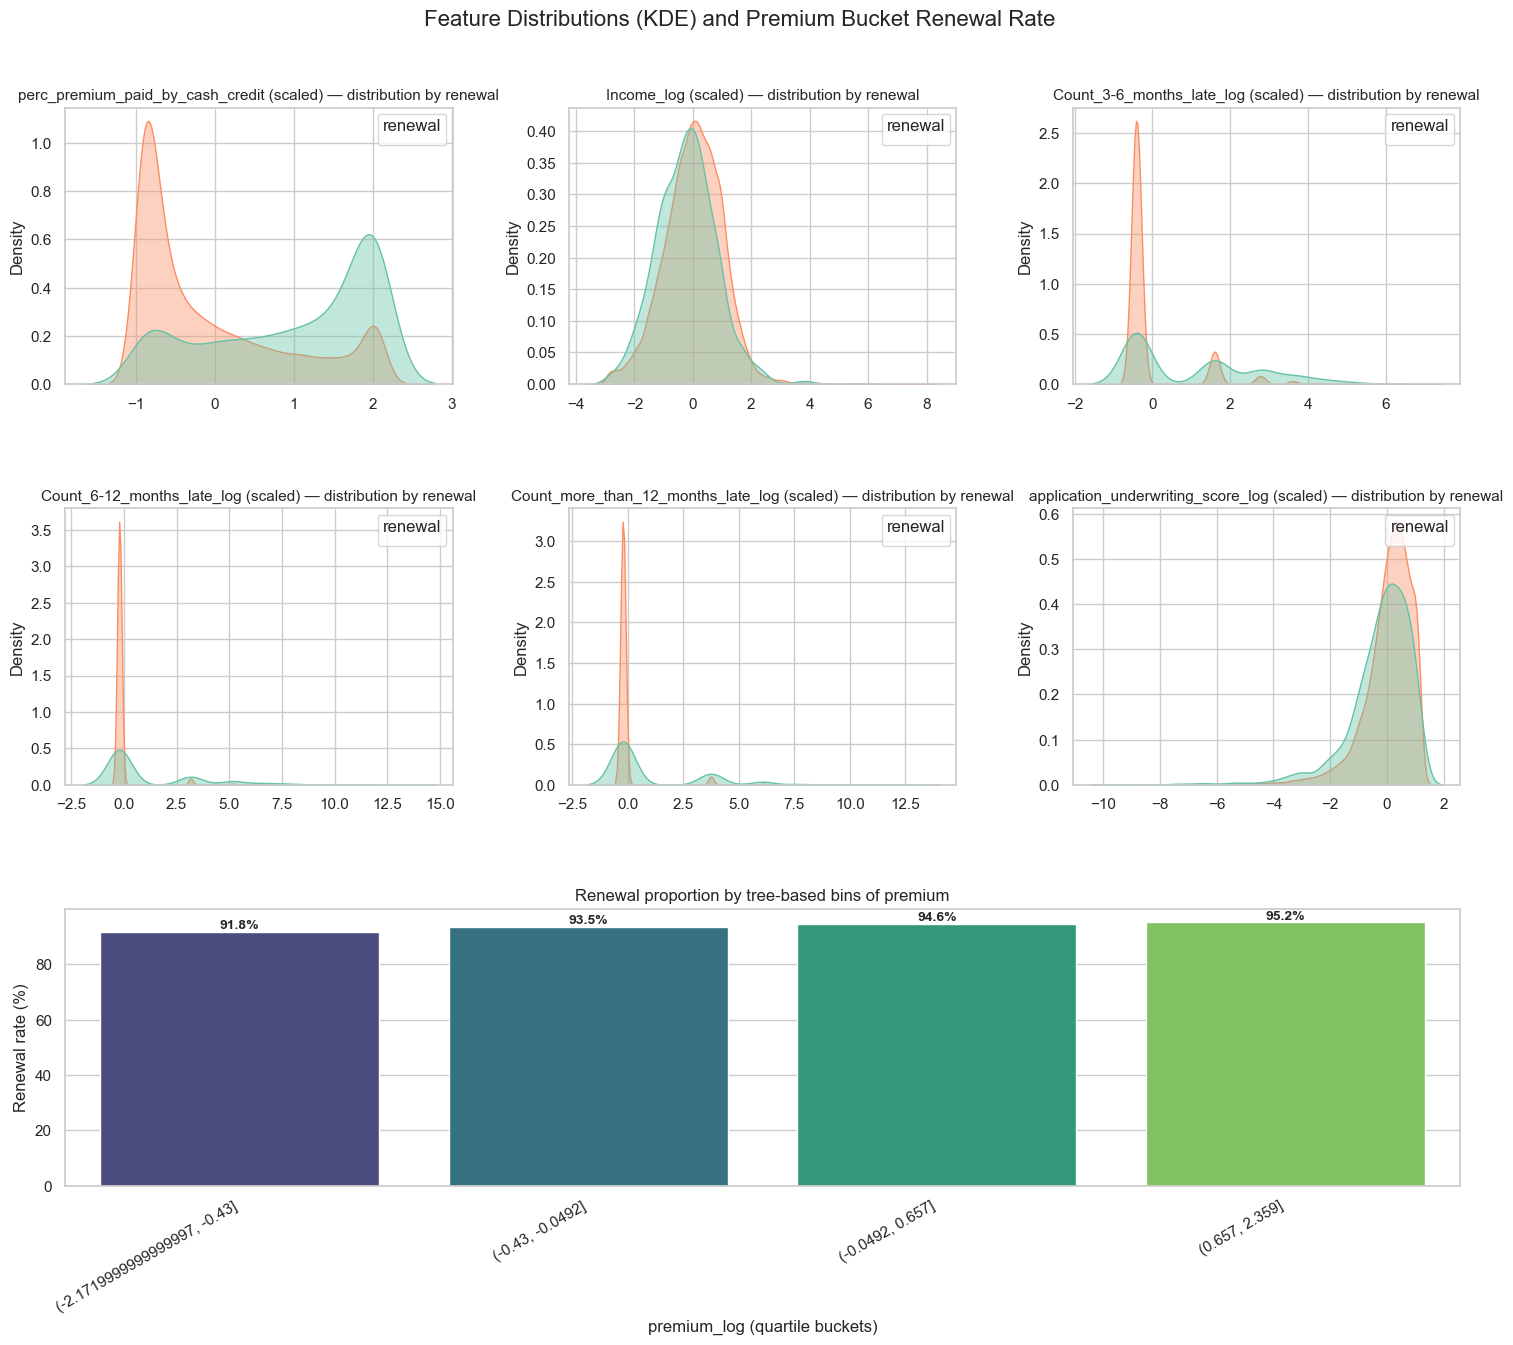

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# X_viz, log_cols, scaler_used = build_viz_scaled_df(...)  # assume you've already run this
# use X_viz from your previous step
# make sure 'premium' exists or premium_log if transformed

sns.set(style="whitegrid")

# choose numeric features to display as KDEs (first 6 excluding 'renewal')
num_feats = X_viz.select_dtypes(include=['float','int']).columns.drop('renewal').tolist()
kde_feats = num_feats[:6]  # first 6 features for KDE

# determine premium column for bar plot (use log if transformed)
base_feat = 'premium'
if base_feat in log_cols:
    premium_col = base_feat + '_log'
else:
    premium_col = base_feat

# prepare figure: 3 columns; 3 rows -> top 2 rows for 6 KDEs (3 per row), last row one bar spanning all cols
ncols = 3
nrows = 3
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(nrows, ncols, hspace=0.45, wspace=0.3)

# plot KDEs (6 subplots)
for i, feat in enumerate(kde_feats):
    r = i // ncols
    c = i % ncols
    ax = fig.add_subplot(gs[r, c])
    sns.kdeplot(data=X_viz, x=feat, hue='renewal', fill=True, common_norm=False,
                alpha=0.4, palette="Set2", ax=ax, linewidth=1)
    ax.set_title(f"{feat} (scaled) — distribution by renewal", fontsize=11)
    ax.set_xlabel("")
    ax.set_ylabel("Density")
    ax.legend(title='renewal', loc='upper right', fontsize=9)

# bottom row: bucketed bar plot for premium spanning all columns
ax_bar = fig.add_subplot(gs[2, :])  # span full width
if premium_col not in X_viz.columns:
    raise ValueError(f"Premium column not found in X_viz: checked '{premium_col}'")

# create quartile buckets on the chosen premium column (use original values if you prefer)
# using qcut on the column (already scaled/logged if applicable)
try:
    X_viz['bucket'] = pd.qcut(X_viz[premium_col], q=4, duplicates='drop')
except ValueError:
    # fallback to cut with equal-width if qcut fails due to too many identical values
    X_viz['bucket'] = pd.cut(X_viz[premium_col], bins=4)

bucket_table = X_viz.groupby('bucket')['renewal'].mean().reset_index()
bucket_table['renewal_pct'] = bucket_table['renewal'] * 100

sns.barplot(data=bucket_table, x='bucket', y='renewal_pct', palette='viridis', ax=ax_bar)
ax_bar.set_ylabel("Renewal rate (%)")
ax_bar.set_xlabel(f"{premium_col} (quartile buckets)")
ax_bar.set_title(f"Renewal proportion by tree-based bins of {base_feat}", fontsize=12)
for p in ax_bar.patches:
    h = p.get_height()
    ax_bar.annotate(f"{h:.1f}%", (p.get_x() + p.get_width() / 2., h),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# tidy up x-rotation for buckets
plt.setp(ax_bar.get_xticklabels(), rotation=30, ha='right')

plt.suptitle("Feature Distributions (KDE) and Premium Bucket Renewal Rate", fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.94])
plt.show()

# drop temp bucket col to keep X_viz unchanged for later
if 'bucket' in X_viz.columns:
    X_viz.drop(columns=['bucket'], inplace=True)
